# Modelling a Free-Fixed End Coupled Oscillator
### Justin Riccardelli and Timothy Beal

Our simulation will model a fixed-free end coupled oscillator a fixed-fixed oscillator and compare the movements of each as we plot each mode.

## The Physics

#### Fixed Ends

When we have 3 masses connected by springs, bound to walls at both ends, we can display our equation of motion for displacement as:

$u_i$ = Displacement of mass i $\newline$
$m_i$ = Mass of i

$$m_1\ddot{u}_1 = -ku_1-k(u_1-u_2)=-2ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)-ku_3=ku_2-2ku_3$$

#### Free Ends

When we have 3 masses connected by springs with unbound at both ends (free), the end masses have 1 spring applying a force to them instead of 2. For this we use the equations listed below

$$m_1\ddot{u}_1 = -k(u_1-u_2)=-ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)=ku_2-ku_3$$

#### Normal mode

For a normal mode, we use the equation below which is a sinusoidal function

$u_i$ = Displacement of mass i $\newline$
$m_i$ = Mass of i $\newline$
$\vec{a}$ = eigenvector

$$u_i = a_i \cos(\omega t + \phi)$$

Substitute this into the differential equations above:

$$ka_1-ka_2 + 0 = m_1\omega^2a_1$$

$$-ka_1+2ka_2 - ka_3 = m_2\omega^2a_2$$

$$0 -ka_2 + ka_3 = m_3\omega^2a_3$$

We can write the equations using matrices

$$
\left[ {\begin{array}{ccc}
   k & -k & 0 \\
   -k & 2k & -k \\
   0 & -k & k \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   m_1 & 0 & 0 \\
   0 & m_2 & 0 \\
   0 & 0 & m_3 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

Define $\lambda=\omega^2$, then

$\lambda=\omega^2$ = eigenvalue $\newline$

$$[A-\lambda B]\vec{a}=0$$

The only difference from having bounded ends is that bounded ends has a factor of 2 on the diagonal of the first row and the last row of $A$ 

## Our Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#animate with vpython
from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

<IPython.core.display.Javascript object>

In [3]:
class boundary:
  
    #    original values for reference
    #    M = 12 - mass of string in kg
    #    L = 10 - length of string in m
    #    K = 1 - effective stiffness in N/m
    #    N = 3 - number of balls
    #    u = None - return from plotmode
    #    W = 0 - number of walls
    
    def __init__(obj,n,m,l,k,w):
        obj.M = m #mass of string in kg
        obj.L = l #length of string in m
        obj.K = k #effective stiffness in N/m
        obj.W = w #number of walls
        obj.N = n + obj.W #number of total objects
        obj.u = None #store value for plotmode function rather than returning it
        
    def setN(obj,val):
        obj.N = val
        
    def getN(obj):
        return obj.N
    
    def setup(obj):
        #properties of each mass
        m = obj.M/obj.N
        obj.L0 = obj.L/(obj.N-1)
        k = obj.K*(obj.N-1)

        #initial conditions
        ui = np.zeros(obj.N) #initial displacement
        ui[0] = 1 #displace first mass

        #Build matrices
        A=np.zeros((obj.N,obj.N))

        for i in range(obj.N):
            A[i,i] = 2*k #the diagonal
            if i==0: #first row
                A[0,i+1]=-k
                A[i,i] = 2*k #free end
            elif i==obj.N-1: #last row
                A[i,i-1]=-k
                if obj.W == 2:
                    A[i,i] = 2*k #free end
                else:
                    A[i,i] = k #free end
            else:
                A[i,i-1]=-k
                A[i,i+1]=-k

        B=m*np.identity(obj.N)

        #find eigenvalues and eigenvectors
        lamb, obj.a = eigh(A, B)        # eigenvalues and eigenvectors
        obj.omegas = np.sqrt(lamb)

        print("\n frequencies (omega):", obj.omegas)
        print("\n eigenvectors are column vectors in:\n\n", obj.a)
        
    def plotmode(obj,mode):
        modeindex = mode-1
        h = 0.01
        ttotal = 20 #total time for calculations

        # array of times
        t = np.arange(0,ttotal,h)

        # build data array with all data; u[:,0] is time; other columns are u_i for each atom i
        obj.u = np.zeros((int(ttotal/h), obj.N+1))

        obj.u[:,0] = np.transpose(t) #t.T

        for i in range(obj.N-1):
            u_atom = obj.a[i+1,modeindex]*np.cos(obj.omegas[modeindex]*t)
            obj.u[:,i+2] = np.transpose(u_atom)[:]

        # plot
        plt.figure(figsize=(12,8))
        plt.title("displacement of each atom")
        plt.xlabel("t (s)")
        plt.ylabel("$u_i$ (m)")
        for i in range(obj.N): #plot each atom
            if i == 0:
                plt.plot(obj.u[:,0], obj.u[:,i+1], label="wall 1".format(i+1))
            elif obj.W == 2 and i == 1:
                plt.plot(obj.u[:,0], obj.u[:,i+1], label="wall 2".format(i+1))
            else:
                plt.plot(obj.u[:,0], obj.u[:,i+1], label="atom {:d}".format(i+1))
        plt.grid()
        plt.legend()
        plt.show()
        
    def animate(obj):
        ####################################
        scene=canvas()

        scene.background=color.white
        scene.fov = 0.1

        thick = obj.L0/20
        height=obj.L0/2

        balls=[]
        xballs = np.linspace(-obj.L/2,obj.L/2,obj.N)

        springs=[]
        i = 0
        for x in xballs:
            if x == xballs[0]:
                Lwall = box(pos = vec(x, 0, 0), size = vec(.5, 10, 0), color=color.black)
                Lwall.eq = x
                balls.append(Lwall)
            elif obj.W == 2 and x == xballs[obj.N-1]:
                Rwall = box(pos = vec(x, 0, 0), size = vec(.5, 10, 0), color=color.black)
                Rwall.eq = x
                balls.append(Rwall)
            else:
                ball = sphere(pos=vec(x,0,0), radius=obj.L0/10, color=color.red)
                ball.eq = x
                balls.append(ball)
            if i < obj.N-1: #no spring to the right of the last mass
                if i == 0:
                    spring = helix(pos=balls[i].pos, axis=vec(-obj.L0,0,0), color=color.orange, radius=obj.L0/10/2)
                    springs.append(spring)
                elif obj.W == 2 and i == obj.N-1:
                    spring = helix(pos=balls[obj.N-1].pos, axis=vec(-obj.L0,0,0), color=color.orange, radius=obj.L0/10/2)
                    springs.append(spring)
                else:
                    spring = helix(pos=ball.pos, axis=vec(obj.L0,0,0), color=color.orange, radius=obj.L0/10/2)
                    springs.append(spring)
            i = i + 1


        #set initial positions
        for i in range(0,len(balls)):
            if i == 0:
                ball = balls[i]
                ball.pos.x = Lwall.eq + obj.u[0,i+1]
            elif obj.W == 2 and i == len(balls):
                ball = balls[i]
                ball.pos.x = Rwall.eq + obj.u[0,i+1]
            else:
                ball = balls[i]
                ball.pos.x = ball.eq + obj.u[0,i+1]
        for i in range(0, len(springs)):
            spring = springs[i]
            spring.pos=balls[i].pos
            spring.axis=balls[i+1].pos-spring.pos

        #animate
        scene.pause()
        t=0
        for n in range(len(obj.u[:,0])):
            rate(300)
            if obj.W==2:
                for i in range(len(balls)-1):
                    ball = balls[i]
                    ball.pos.x = ball.eq + obj.u[n,i+1]
            else:
                for i in range(len(balls)):
                    ball = balls[i]
                    ball.pos.x = ball.eq + obj.u[n,i+1]
            for i in range(len(springs)):
                spring = springs[i]
                spring.pos=balls[i].pos
                spring.axis=balls[i+1].pos-spring.pos

Below we have the setup for our systems that we will be comparing

In [4]:
obj = boundary(3,12,10,1,2)
obj1 = boundary(3,12,10,1,1)

In [5]:
ret = obj.getN() # Fixed-Fixed

In [6]:
ret1 = obj1.getN() # Fixed-Free


Below shows the eighenvalues and eigenvectors of our systems. For reference, obj is our fixed-fixed and obj1 is our fixed-free

In [7]:
obj.setup() #Fixed-Fixed
obj1.setup() #Fixed-Free


 frequencies (omega): [0.6682679  1.29099445 1.82574186 2.23606798 2.49400976]

 eigenvectors are column vectors in:

 [[-1.86338998e-01 -3.22748612e-01  3.72677996e-01 -3.22748612e-01
   1.86338998e-01]
 [-3.22748612e-01 -3.22748612e-01 -1.38590724e-16  3.22748612e-01
  -3.22748612e-01]
 [-3.72677996e-01 -2.62322106e-17 -3.72677996e-01 -6.29545435e-17
   3.72677996e-01]
 [-3.22748612e-01  3.22748612e-01  1.04313312e-16 -3.22748612e-01
  -3.22748612e-01]
 [-1.86338998e-01  3.22748612e-01  3.72677996e-01  3.22748612e-01
   1.86338998e-01]]

 frequencies (omega): [0.34729636 1.         1.53208889 1.87938524]

 eigenvectors are column vectors in:

 [[-1.31643615e-01  3.33333333e-01  3.79052681e-01 -2.47409066e-01]
 [-2.47409066e-01  3.33333333e-01 -1.31643615e-01  3.79052681e-01]
 [-3.33333333e-01  4.13637197e-17 -3.33333333e-01 -3.33333333e-01]
 [-3.79052681e-01 -3.33333333e-01  2.47409066e-01  1.31643615e-01]]


#### Normal Mode 1

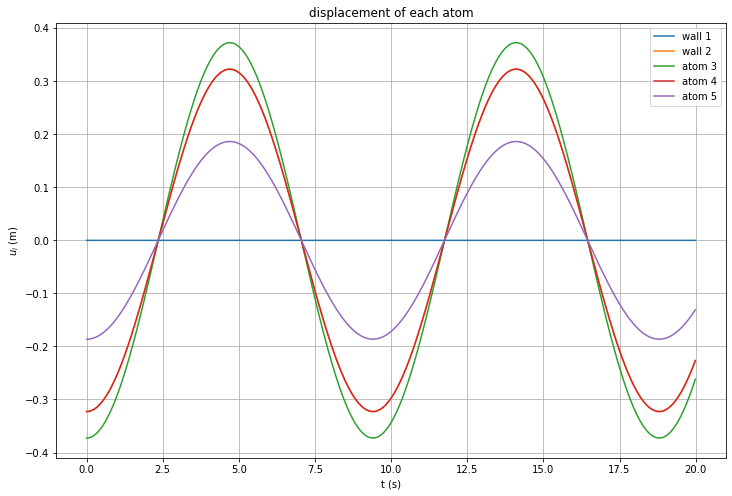

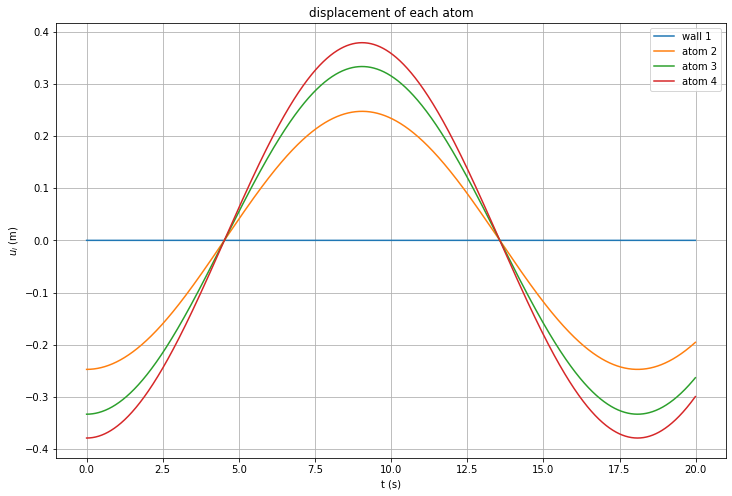

In [12]:
obj.plotmode(1) #Fixed-Fixed
obj1.plotmode(1) #Fixed-Free

As we can see in our graphing above, both systems follow a very similar displacement pattern. The fixed-fixed sees a lowest displacement by a ball compared to fixed-free, but the frequence of fixed fixed is approximately 2 times greater.

#### Normal Mode 2

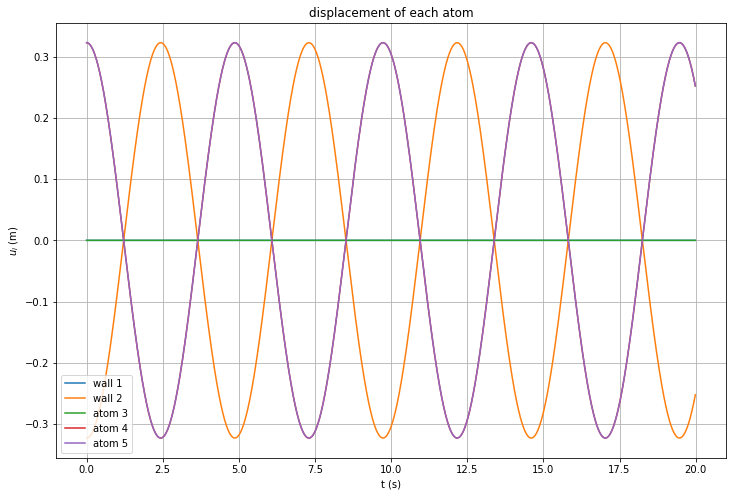

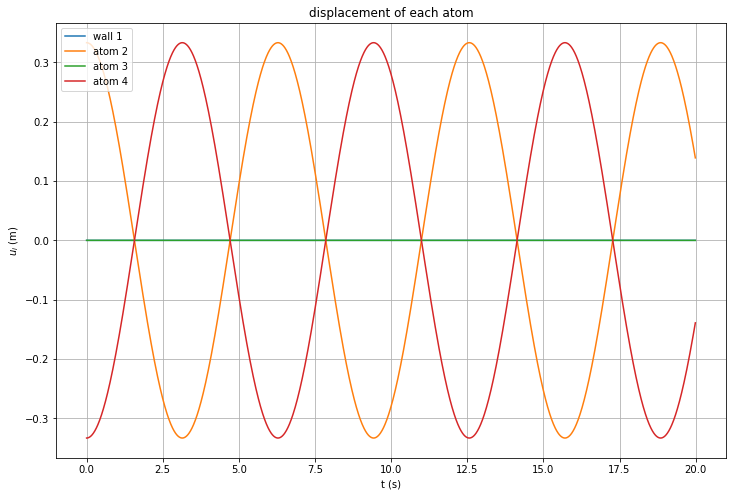

In [9]:
obj.plotmode(2) #Fixed-Fixed
obj1.plotmode(2) #Fixed-Free

From the graphs above, we see the same charateristics similar between the two systems again. The both have similar displacements, but the fixed fixed system still has a higher frequencey.

#### Normal Mode 3

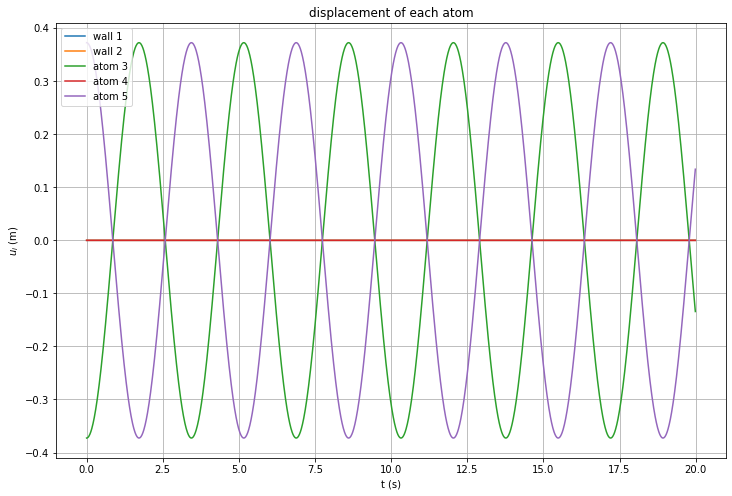

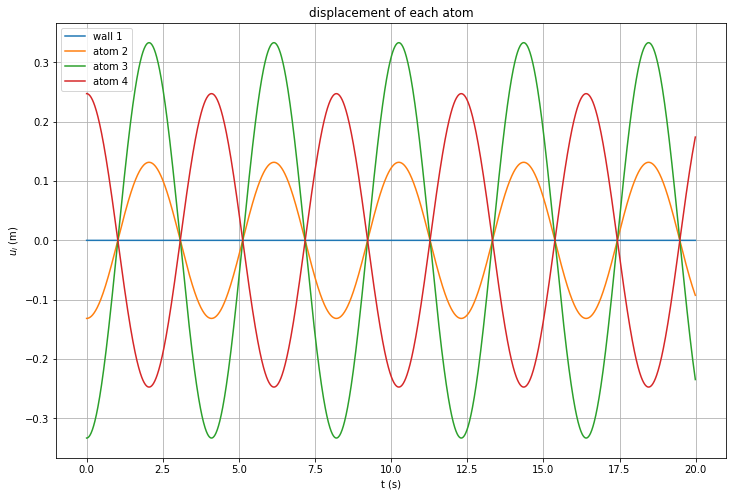

In [10]:
obj.plotmode(3) #Fixed-Fixed
obj1.plotmode(3) #Fixed-Free

With normal mode three, we see bigger differences between the systems. The fixed-fixed system has a consitent displacement of 2 of the atoms, with a higher frequency and displacement. The fixed-free system has an inconsistent pattern of displacement between the atoms, with a slower frequency then the fixed-fixed system.

#### Normal Mode 4

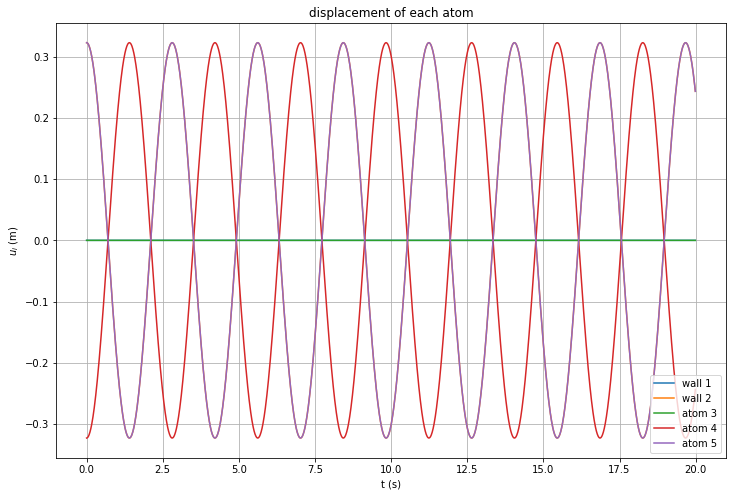

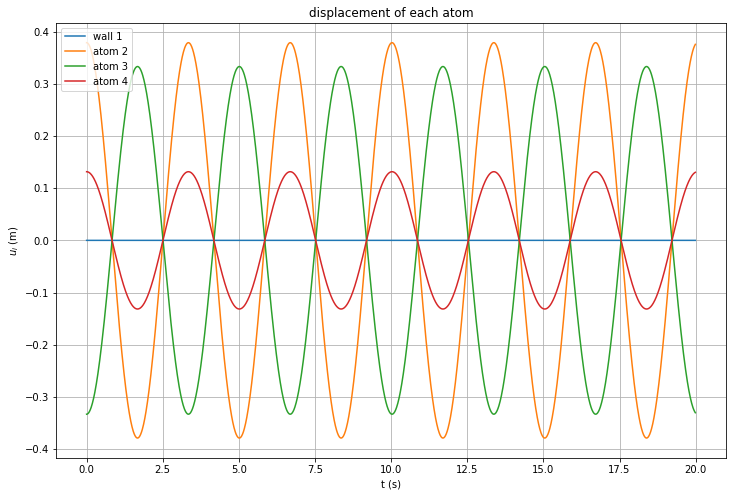

In [13]:
obj.plotmode(4) #Fixed-Fixed
obj1.plotmode(4) #Fixed-Free

This mode follow a similar pattern of mode 3. The difference for the fixed-fixd system is a lower displacement for both atoms and a higher frequency then mode 3. The fixed-free end still have an inconsistent displacement, but 2 atoms are more similar then the mode before, and it also has a higher frequency

## Conclusion

From our results there are 2 distinctions that we can make. The first being that a fixed-fixed system will have a higher frequency then a fixed-free system in all modes. The second being that fixed-fixed and fixed-free does not make a pattern of greater or lesser displacement. Only one mode see a greater displacement of an atom then another system, but they were very similar in all other cases. Another difference we saw is that in normal modes 3-4, only 2 atoms were moving in the fixed-fixed system, while all 3 were moving in the fixed-free system

In [20]:
#obj.animate()

In [22]:
#obj1.animate()